In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt

# load data set

In [8]:
train = fetch_20newsgroups(subset="train",random_state=42)
test = fetch_20newsgroups(subset='test',random_state=42)
categories = train.target_names


In [10]:
print("count of train: ",len(train))
print("count of test: ",len(test))
print(" target values count :" , len(categories))

count of train:  5
count of test:  5
 target values count : 20


In [11]:
print(categories)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [14]:
#check how the data set is

print(train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







# modeling

In [13]:
pipeline = make_pipeline(TfidfVectorizer(),MultinomialNB())

pipeline.fit(train.data,train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [15]:
predict = pipeline.predict(test.data)

In [16]:
print("actual categories: ",test.target[0])
print("predicted categorries: ", predict[0])

actual categories:  7
predicted categorries:  7


# model evaluation

In [19]:
accuracy_score(test.target,predict)

0.7738980350504514

In [20]:
#confusion matrix
cm=confusion_matrix(test.target,predict)

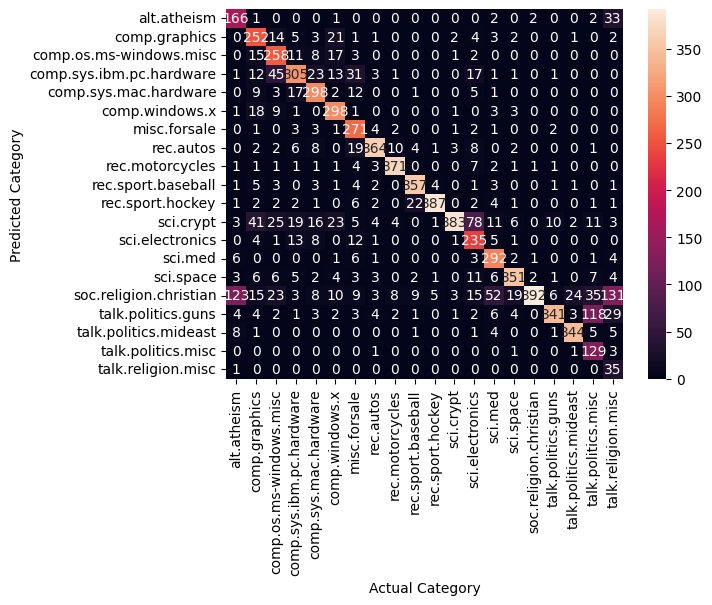

In [28]:
sns.heatmap(
    cm.T,
    annot=True,
    fmt = 'd',
    xticklabels=categories,
    yticklabels=categories
    
)
plt.xlabel("Actual Category")
plt.ylabel("Predicted Category")
plt.show()

In [30]:
#classification report
print(classification_report(test.target,predict))

              precision    recall  f1-score   support

           0       0.80      0.52      0.63       319
           1       0.81      0.65      0.72       389
           2       0.82      0.65      0.73       394
           3       0.67      0.78      0.72       392
           4       0.86      0.77      0.81       385
           5       0.89      0.75      0.82       395
           6       0.93      0.69      0.80       390
           7       0.85      0.92      0.88       396
           8       0.94      0.93      0.93       398
           9       0.92      0.90      0.91       397
          10       0.89      0.97      0.93       399
          11       0.59      0.97      0.74       396
          12       0.84      0.60      0.70       393
          13       0.92      0.74      0.82       396
          14       0.84      0.89      0.87       394
          15       0.44      0.98      0.61       398
          16       0.64      0.94      0.76       364
          17       0.93    